In [18]:
# Data Cleaning
import pandas as pd
from scipy import stats

In [19]:
raw = pd.read_csv(r'raw\raw-video-game-sales.csv'
                  ,delimiter=',')
df = raw.copy()
df.head(8)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


# Drop

In [20]:
df = df.drop(columns=['Rank','Name','Publisher'])

In [21]:
df['Genre'] = df['Genre'].str.replace('Role-Playing','RPG')

In [22]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'RPG', 'Puzzle', 'Misc', 'Shooter',
       'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy'],
      dtype=object)

In [23]:
df = df.where(~(df['Genre']=='Misc')).dropna()

In [24]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'RPG', 'Puzzle', 'Shooter',
       'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy'],
      dtype=object)

# Missing

In [25]:
df['Year'] = df['Year'].interpolate(method='linear').round().astype(int)
df['Year'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2013,
       2004, 1990, 1988, 2002, 2010, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2003, 1986, 2000, 1995, 2016, 1991,
       1981, 1987, 1980, 1983, 2020, 2017])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14617 entries, 0 to 16597
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      14617 non-null  object 
 1   Year          14617 non-null  int32  
 2   Genre         14617 non-null  object 
 3   NA_Sales      14617 non-null  float64
 4   EU_Sales      14617 non-null  float64
 5   JP_Sales      14617 non-null  float64
 6   Other_Sales   14617 non-null  float64
 7   Global_Sales  14617 non-null  float64
dtypes: float64(5), int32(1), object(2)
memory usage: 970.7+ KB


# Pre-Clean 

Checkpoint

In [27]:
df.to_csv(r'pre-video-game-sales.csv'
          ,index=False)

In [28]:
df_pre = pd.read_csv(r'pre-video-game-sales.csv'
                  ,delimiter=',')
df = df_pre.copy()

# Outliers

In [29]:
z_global_sales = stats.zscore(df['Global_Sales'])
outliers_global_sales = (z_global_sales>3)|(z_global_sales<-3)
df = df[~outliers_global_sales]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14459 entries, 158 to 14616
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      14459 non-null  object 
 1   Year          14459 non-null  int64  
 2   Genre         14459 non-null  object 
 3   NA_Sales      14459 non-null  float64
 4   EU_Sales      14459 non-null  float64
 5   JP_Sales      14459 non-null  float64
 6   Other_Sales   14459 non-null  float64
 7   Global_Sales  14459 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1016.6+ KB


<Axes: title={'center': 'Global Sales'}>

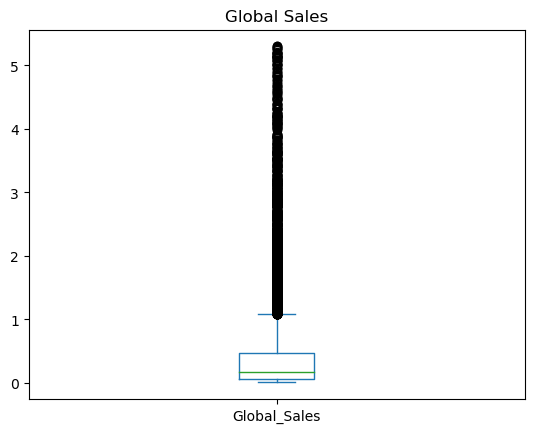

In [31]:
df['Global_Sales'].plot(kind='box', title='Global Sales')

# CLEAN

In [32]:
df.to_csv('clean-video-game-sales.csv'
          ,index=False)